###  #  Python Data Types

## PETE 2061 Lab 3 Workbook 

## THIS IS DUE BY 10:20 AM TODAY

<a id='top'></a>

Step 1. Paste the url (or link) to the pete2061 folder in your github account in the "marked down" cell below. <br>

<a id='variables'></a>
## Decline Curve Analysis
Well A flows with an initial flow rate ($q_i$) of 6,000 bopd (barrels of oil per day), and has a continuous initial decline rate ($D_i$) of 10% per year. The well declines exponentially. <br><br>

Step 2. Store the given values in appropriately named variables. (I won't mention this in future lab workbooks! I
believe you now know that you have to assign any needed values into named variables before using them in calculations.)<br>
Step 3. Import numpy (I won't mention this in future lab workbooks, because you will need to import any required libraries before you can use the functions within those libraries).<br>
Step 4. Create a one-dimensional (1D) time array called timeVec and let it store numbers from 0 through 20 in increments of 1. <br>
Step 5. Write a one-line vectorized Python code that computes the rates corresponding to the times stored in timeVec, and store these rates in an array called "rateExp". rateExp will be the same length as timeVec.<br>
Step 6. Import matplotlib.pyplot as plt, and use plt.plot() and plt.show() to plot and display a graph of rateExp versus timeVec, using a green solid line and square markers. (I won't mention this in future lab workbooks, because you will need to import any required libraries before you can use the functions within those libraries).<br>

<function matplotlib.pyplot.show(*args, **kw)>

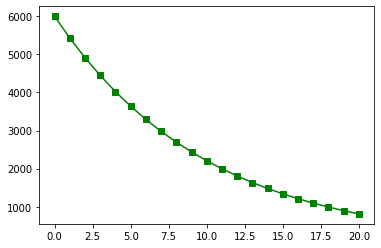

In [14]:
qi_A = 6000.0
Di_A = 0.10

import numpy as np
timeVec = np.arange(0,21,1)
#print(timeVec)
rateExp = qi_A * np.exp(-Di_A * timeVec)
#print(rateExp)

import matplotlib.pyplot as plt
plt.plot(timeVec,rateExp,'g-s')
plt.show


Step 7. Print the data type of the timeVec array, using the numpy function "dtype"<br>
Step 8. Create an array of the same shape with timeVec, call it "rateExp2", and initialize it to zeros.<br>
Step 9. Instead of the vectorized computation of rateExp, use a for loop to compute the rate, and store this in an array called "rateExp2" <br>
Step 10. Plot rateExp2 versus timeVec<br>

<function matplotlib.pyplot.show(*args, **kw)>

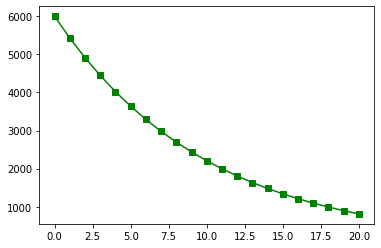

In [25]:
#print(timeVec.dtype)
rateExp2 = np.zeros(timeVec.shape)

index = 0
for i in timeVec:
    rateExp2[index] = qi_A * np.exp(-Di_A * i)
    index += 1
    
plt.plot(timeVec,rateExp2,'g-s')
plt.show

## Extra Credit
For extra credit of up to 15% of the total value of this lab. Solve the following additional steps

Step 11. Repeat steps 2 through 10, but this time, let time be in days. So, timeVec will go from 0 to 20*365. Note that instead of D_i, you will need to use D_i_inDays = D_i/365.<br>
Step 12. Time both the vectorized calculation and the for loop, and print out the time spent in both. Which is faster?<br>
Step 13. Using a b-exponent of 0.45 (b=0.45), compute rateHyp, which is the flow rate for a hyperbolic decline. Plot this against time. Feel free to perform the calculation using t in years or in days, but make sure to use "D_i" in %/yr if t is in years, and "D_i_inDays" in %/day if t is in days.<br>
Step 14. Compute rateHarm, which is the flow rate for a harmonic decline. Plot this against time. Feel free to perform the calculation using t in years or in days, but make sure to use "D_i" in %/yr if t is in years, and "D_i_inDays" in %/day if t is in days.<br>
Step 15. Compute and plot the exponential, hyperbolic and harmonic cumulative oil production (versus timeVec) all on the same graph, and show the legend. <br>

<function matplotlib.pyplot.show(*args, **kw)>

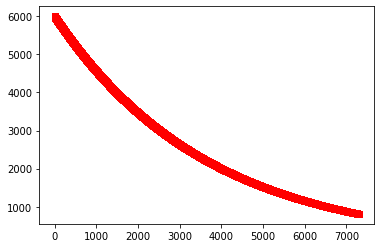

In [59]:
qi_A = 6000.0
D_I_indays = Di_A / 365

timeVec = np.arange(0, 20 * 365 + 1, 1)
#print(timeVec)
rateExp = qi_A * np.exp(-D_I_indays * timeVec)
#print(rateExp)

plt.plot(timeVec,rateExp,'r-s')
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

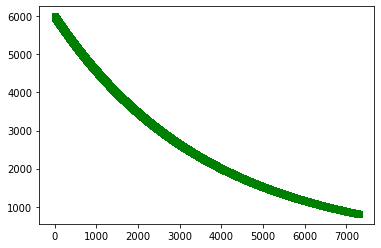

In [35]:
#this is another way to get the plot

rateExp2 = np.zeros(timeVec.shape)

index = 0
for i in timeVec:
    rateExp2[index] = qi_A * np.exp(-D_I_indays * i)
    index += 1
    
plt.plot(timeVec,rateExp2,'g-s')
plt.show

#they take almost the same time but the first method (without looping) is faster

<function matplotlib.pyplot.show(*args, **kw)>

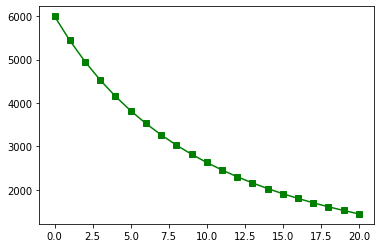

In [47]:

b = 0.45
timeVec = np.arange(0,21,1)

rateHyp = qi_A / ((1 + b * Di_A * timeVec) ** (1/b))

plt.plot(timeVec,rateHyp,'g-s')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

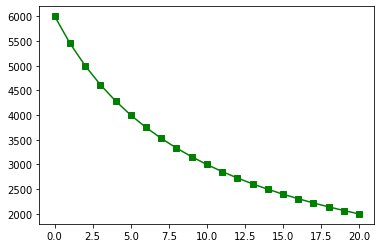

In [48]:
rateHarm = qi_A / (1 + Di_A * timeVec)
plt.plot(timeVec,rateHarm,'g-s')
plt.show

Text(0, 0.5, 'Cum. Oil Production (stb)')

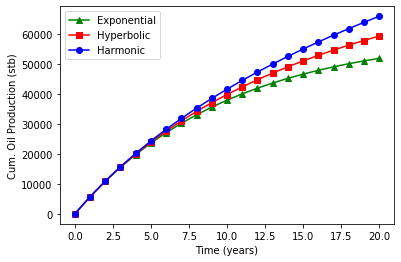

In [83]:
timeVec = np.arange(0,21,1)
rateExp = qi_A * np.exp(-Di_A * timeVec)

Np_Exp = (qi_A - rateExp) / Di_A
Np_Hyp = (qi_A / (Di_A *(1-b))) * (1- (1 / ((1 + b * Di_A * timeVec ) ** ((1 - b )/ b))  ) )
Np_Harm = (qi_A / Di_A) * np.log(1 + Di_A * timeVec)

plt.plot( timeVec, Np_Exp, 'g^-',label='Exponential')
plt.plot(timeVec, Np_Hyp , 'r-s', label = 'Hyperbolic')
plt.plot(timeVec, Np_Harm, 'bo-' , label ='Harmonic')
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Cum. Oil Production (stb)')
